# Combinaciones de rutas

In [107]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd


import matplotlib.pyplot as plt


### Cargamos Secuencias de rutas

In [ ]:
#rutaspacifico = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Pacifico.xlsx')
#rutascentro = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Centro.xlsx')
#rutasgolfo = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Golfo.xlsx')

In [ ]:
#rutaspacifico.dropna(axis=1, how='all', inplace=True)
#rutascentro.dropna(axis=1, how='all', inplace=True)
#rutasgolfo.dropna(axis=1, how='all', inplace=True)

In [ ]:
# Reemplazamos los NaN por una cadena vacía y convertimos los números a texto con el formato 'PG####'
#rutaspacifico_str = rutaspacifico.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')
#rutascentro_str = rutascentro.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')
#rutasgolfo_str = rutasgolfo.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')


In [ ]:
# Combina las columnas en una cadena separada por comas
#rutaspacifico_str['secuencias_pacifico'] = rutaspacifico_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)
#rutascentro_str['secuencias_centro'] = rutascentro_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)
#rutasgolfo_str['secuencias_golfo'] = rutasgolfo_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)


In [ ]:
# Crear un nuevo DataFrame con una sola columna que contiene las secuencias
#df_secuencias_pacifico = pd.DataFrame({'secuencias_pacifico': rutaspacifico_str['secuencias_pacifico']})
#df_secuencias_centro = pd.DataFrame({'secuencias_centro': rutascentro_str['secuencias_centro']})
#df_secuencias_golfo = pd.DataFrame({'secuencias_golfo': rutasgolfo_str['secuencias_golfo']})


In [ ]:
# Verificar filas duplicadas en df_secuencias_pacifico
#duplicados_pacifico = df_secuencias_pacifico.duplicated()
#print("Filas duplicadas en Pacifico:", df_secuencias_pacifico[duplicados_pacifico])

# Verificar filas duplicadas en df_secuencias_centro
#duplicados_centro = df_secuencias_centro.duplicated()
#print("Filas duplicadas en Centro:", df_secuencias_centro[duplicados_centro])

# Verificar filas duplicadas en df_secuencias_golfo
#duplicados_golfo = df_secuencias_golfo.duplicated()
#print("Filas duplicadas en Golfo:", df_secuencias_golfo[duplicados_golfo])


In [ ]:
# Eliminar filas duplicadas en df_secuencias_pacifico
#df_secuencias_pacifico = df_secuencias_pacifico.drop_duplicates()

# Eliminar filas duplicadas en df_secuencias_centro
#df_secuencias_centro = df_secuencias_centro.drop_duplicates()

# Eliminar filas duplicadas en df_secuencias_golfo
#df_secuencias_golfo = df_secuencias_golfo.drop_duplicates()


In [ ]:
# Cambiar el nombre de la columna en df_secuencias_centro
#df_secuencias_centro = df_secuencias_centro.rename(columns={'secuencias_centro': 'secuencias'})

# Cambiar el nombre de la columna en df_secuencias_golfo
#df_secuencias_golfo = df_secuencias_golfo.rename(columns={'secuencias_golfo': 'secuencias'})

# Cambiar el nombre de la columna en df_secuencias_pacifico
#df_secuencias_pacifico = df_secuencias_pacifico.rename(columns={'secuencias_pacifico': 'secuencias'})

In [ ]:
# Definir los nombres y prefijos de los identificadores para cada área
#nombres_areas = ['pacifico', 'centro', 'golfo']
#prefijos_areas = ['RP', 'RC', 'RG']

# Iterar sobre cada DataFrame y su respectivo nombre de área
#for nombre_area, prefijo_area in zip(nombres_areas, prefijos_areas):
    # Obtener el DataFrame correspondiente
#    df = globals()[f"df_secuencias_{nombre_area}"]
    
    # Generar identificadores únicos para cada secuencia en el DataFrame
#    identificadores = [f"{prefijo_area}{i+1:03d}" for i in range(len(df))]
    
    # Agregar la columna 'ID_Ruta' con los identificadores al DataFrame
#    df['ID_Ruta'] = identificadores
    
    # Reordenar las columnas
#    df = df[['ID_Ruta', 'secuencias']]
    
    # Mostrar las primeras filas del DataFrame para verificar
#    print(f"DataFrame df_secuencias_{nombre_area} con identificadores:")
#    print(df.head())
    print()


### Guardamos df con secuencias

In [ ]:
#df_secuencias_pacifico.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Pacifico.csv')
#df_secuencias_centro.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')
#df_secuencias_golfo.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Golfo.csv')

In [2]:
df_secuencias_pacifico = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Pacifico.csv')
df_secuencias_centro = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')
df_secuencias_golfo = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Golfo.csv')

### Notas:

Al procesar las rutas, nos dimos cuenta que habia muchas secuencias duplicadas. Tambien sera importante a la hora de reproducir la ultima version del ejercicio, eliminar filas intermedias antes de procesar los datos

## Valores / ruta 

In [3]:
dfvalores = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')

In [4]:
dfvalores.head()

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,detenciones,detenciones_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado
0,"Zihuatanejo de Azueta, Guerrero","Zihuatanejo de Azueta, Guerrero",Guerrero,17.807900,-101.496952,P,PG1027,P-PG1027-1,14,14,1,0,1,0,0,1
1,"Morelia, Michoacan","Morelia, Michoacan",Michoacan,19.702712,-101.192382,P,PG1029,P-PG1029-1,137,137,0,0,0,0,0,1
2,"Cuitzeo, Michoacan","Cuitzeo, Michoacan",Michoacan,19.969314,-101.141220,P,PG1030,P-PG1030-1,1,1,0,0,0,0,1,1
3,"Leon, Guanajuato","Leon, Guanajuato",Guanajuato,21.121860,-101.682508,C,PG1031,C-PG1031-1,2,52,0,0,0,2,8,23
4,"Irapuato, Guanajuato","Irapuato, Guanajuato",Guanajuato,20.675876,-101.352105,C,PG1031,C-PG1031-2,44,52,0,0,0,5,8,23


In [5]:
dfvalores.shape

(442, 16)

#### Ciudad Top (Detenciones)

Filtramos el df de manera que nos quede la ciudad con mas detenciones de cada grid

In [6]:
# Agrupamos por 'ID_Poligono' y encontramos la ciudad con el máximo número de 'detenciones' para cada grupo
ciudades_top_valores = dfvalores.loc[dfvalores.groupby('ID_Poligono')['detenciones'].idxmax()]

# Resetear el índice si es necesario
ciudades_top_valores.reset_index(drop=True, inplace=True)

# Mostramos las primeras filas del nuevo DataFrame para verificar
print(ciudades_top_valores.head())


                            nombre                           ciudad  \
0  Zihuatanejo de Azueta, Guerrero  Zihuatanejo de Azueta, Guerrero   
1               Morelia, Michoacan               Morelia, Michoacan   
2               Cuitzeo, Michoacan               Cuitzeo, Michoacan   
3             Irapuato, Guanajuato             Irapuato, Guanajuato   
4               Ocampo, Guanajuato               Ocampo, Guanajuato   

       estado    latitud    longitud codigo_ruta ID_Poligono codigo_unico  \
0    Guerrero  17.807900 -101.496952           P      PG1027   P-PG1027-1   
1   Michoacan  19.702712 -101.192382           P      PG1029   P-PG1029-1   
2   Michoacan  19.969314 -101.141220           P      PG1030   P-PG1030-1   
3  Guanajuato  20.675876 -101.352105           C      PG1031   C-PG1031-2   
4  Guanajuato  21.604282 -101.476239           C      PG1032   C-PG1032-1   

   detenciones  detenciones_in_grid  inm_30km  inm_in_grid  inm_in_estado  \
0           14                   

In [79]:
ciudades_top_valores.head(60)

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,detenciones,detenciones_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado
0,"Zihuatanejo de Azueta, Guerrero","Zihuatanejo de Azueta, Guerrero",Guerrero,17.807900,-101.496952,P,PG1027,P-PG1027-1,14,14,1,0,1,0,0,1
1,"Morelia, Michoacan","Morelia, Michoacan",Michoacan,19.702712,-101.192382,P,PG1029,P-PG1029-1,137,137,0,0,0,0,0,1
2,"Cuitzeo, Michoacan","Cuitzeo, Michoacan",Michoacan,19.969314,-101.141220,P,PG1030,P-PG1030-1,1,1,0,0,0,0,1,1
3,"Irapuato, Guanajuato","Irapuato, Guanajuato",Guanajuato,20.675876,-101.352105,C,PG1031,C-PG1031-2,44,52,0,0,0,5,8,23
4,"Ocampo, Guanajuato","Ocampo, Guanajuato",Guanajuato,21.604282,-101.476239,C,PG1032,C-PG1032-1,6,6,0,0,0,0,0,23
5,"Monclova, Coahuila","Monclova, Coahuila",Coahuila,26.899999,-101.417117,C,PG1040,C-PG1040-1,0,0,0,0,4,0,0,27
6,"Zinapecuaro, Michoacan","Zinapecuaro, Michoacan",Michoacan,19.856318,-100.770910,P,PG1069,P-PG1069-1,176,177,0,0,0,0,1,1
7,"Comonfort, Guanajuato","Comonfort, Guanajuato",Guanajuato,20.719947,-100.761188,C,PG1070,C-PG1070-2,29,80,0,0,0,4,6,23
8,"San Luis de la Paz, Guanajuato","San Luis de la Paz, Guanajuato",Guanajuato,21.297047,-100.516269,C,PG1071,C-PG1071-1,60,60,0,0,0,0,0,23
9,"San Luis Potosi, San Luis Potosi","San Luis Potosi, San Luis Potosi",San Luis Potosi,22.500000,-100.494914,C,PG1072,C-PG1072-1,0,0,0,1,1,0,4,4


## Rutas (Ordenado y Filtrado top 3 por region):

### Rutas Top 3 (Detenciones)

#### df_secuencias_pacifico

In [15]:
# Inicializa la lista para almacenar las sumas de detenciones por ruta en el Pacífico
pacifico_sumas = []

# Itera sobre las secuencias del DataFrame df_secuencias_pacifico
for index, row in df_secuencias_pacifico.iterrows():
    # Extrae la secuencia actual y la divide en los IDs individuales
    ids_poligono = row['secuencias'].split(', ')
    # Inicializa las sumas para esta secuencia
    sumas = {
        'detenciones_total': 0,
        'detenciones_in_grid_total': 0,
    }
    
    # Busca cada ID en ciudades_top_valores y suma los valores de las columnas correspondientes
    for id_poligono in ids_poligono:
        data = ciudades_top_valores[ciudades_top_valores['ID_Poligono'] == id_poligono]
        for columna in sumas.keys():
            # Remueve '_total' para coincidir con los nombres de las columnas originales
            col_name = columna.replace('_total', '')
            # Suma si la columna existe en data
            if col_name in data.columns:
                sumas[columna] += data[col_name].sum()

    # Añade la secuencia y las sumas a la lista
    pacifico_sumas.append({'ID_Ruta': row['ID_Ruta'], 'secuencia': row['secuencias'], **sumas})

# Crea el DataFrame final a partir de la lista de resultados
df_pacifico_sumas = pd.DataFrame(pacifico_sumas)

# Reordena las columnas para incluir 'ID_Ruta' antes de 'secuencias'
df_pacifico_sumas = df_pacifico_sumas[['ID_Ruta', 'secuencia', 'detenciones_total', 'detenciones_in_grid_total']]


In [26]:
df_pacifico_sumas = df_pacifico_sumas.sort_values('detenciones_total', ascending=False)

In [43]:
df_pacifico_sumas.head(6)

,ID_Ruta,secuencia,detenciones_total,detenciones_in_grid_total,grupo
610,RP611,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...",8544,11013,"PG1531, PG1532, PG1493, PG1454, PG1415"
613,RP614,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...",8543,11012,"PG1531, PG1532, PG1493, PG1454, PG1415"
600,RP601,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...",8446,10912,"PG1531, PG1532, PG1493, PG1454, PG1415"
603,RP604,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...",8445,10911,"PG1531, PG1532, PG1493, PG1454, PG1415"
620,RP621,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...",8438,10904,"PG1531, PG1532, PG1493, PG1454, PG1415"
623,RP624,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...",8437,10903,"PG1531, PG1532, PG1493, PG1454, PG1415"


In [50]:
# Aquí debemos definir qué consideramos como 'primeras etapas'. Como ejemplo, usaremos las primeras 3 'PGxxx'
df_pacifico_sumas['grupo'] = df_pacifico_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[:4]))

# Agrupar por 'grupo' y obtener el índice de la fila con el mayor 'detenciones_total' para cada grupo
idx = df_pacifico_sumas.groupby('grupo')['detenciones_total'].idxmax()

# Filtrar el DataFrame original para mantener solo las filas con más 'detenciones_total' por grupo
df_filtrado = df_pacifico_sumas.loc[idx].reset_index(drop=True)

# Eliminar la columna 'grupo' que se agregó para el filtrado
df_filtrado.drop(columns=['grupo'], inplace=True)


In [51]:
df_filtrado_sorted = df_filtrado.sort_values(by='detenciones_total', ascending=False)

# Mostrar el DataFrame ordenado
df_filtrado_sorted.head(40)


,ID_Ruta,secuencia,detenciones_total,detenciones_in_grid_total
3,RP611,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...",8544,11013
2,RP401,"PG1531, PG1530, PG1491, PG1492, PG1453, PG1414...",7309,9137
0,RP102,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",7127,8462
1,RP281,"PG1530, PG1491, PG1492, PG1453, PG1414, PG1415...",6507,7820


#### df_secuencias_centro

In [52]:
# Inicializa la lista para almacenar las sumas de detenciones por ruta en el Pacífico
centro_sumas = []

# Itera sobre las secuencias del DataFrame df_secuencias_pacifico
for index, row in df_secuencias_centro.iterrows():
    # Extrae la secuencia actual y la divide en los IDs individuales
    ids_poligono = row['secuencias'].split(', ')
    # Inicializa las sumas para esta secuencia
    sumas = {
        'detenciones_total': 0,
        'detenciones_in_grid_total': 0,
    }
    
    # Busca cada ID en ciudades_top_valores y suma los valores de las columnas correspondientes
    for id_poligono in ids_poligono:
        data = ciudades_top_valores[ciudades_top_valores['ID_Poligono'] == id_poligono]
        for columna in sumas.keys():
            # Remueve '_total' para coincidir con los nombres de las columnas originales
            col_name = columna.replace('_total', '')
            # Suma si la columna existe en data
            if col_name in data.columns:
                sumas[columna] += data[col_name].sum()

    # Añade la secuencia y las sumas a la lista
    centro_sumas.append({'ID_Ruta': row['ID_Ruta'], 'secuencia': row['secuencias'], **sumas})

# Crea el DataFrame final a partir de la lista de resultados
df_centro_sumas = pd.DataFrame(centro_sumas)

# Reordena las columnas para incluir 'ID_Ruta' antes de 'secuencias'
df_centro_sumas = df_centro_sumas[['ID_Ruta', 'secuencia', 'detenciones_total', 'detenciones_in_grid_total']]


In [53]:
df_centro_sumas = df_centro_sumas.sort_values('detenciones_total', ascending=False)

In [72]:
# Aquí debemos definir qué consideramos como 'primeras etapas'. Como ejemplo, usaremos las primeras 3 'PGxxx'
df_centro_sumas['grupo'] = df_centro_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[:5]))

# Agrupar por 'grupo' y obtener el índice de la fila con el mayor 'detenciones_total' para cada grupo
idx = df_centro_sumas.groupby('grupo')['detenciones_total'].idxmax()

# Filtrar el DataFrame original para mantener solo las filas con más 'detenciones_total' por grupo
df_filtrado1 = df_centro_sumas.loc[idx].reset_index(drop=True)

# Si necesitas eliminar la columna 'grupo' que se agregó para el filtrado
df_filtrado1.drop(columns=['grupo'], inplace=True)


In [74]:
df_filtrado1_sorted = df_filtrado1.sort_values(by='detenciones_total', ascending=False)

# Mostrar el DataFrame ordenado
df_filtrado1_sorted.head(40)

,ID_Ruta,secuencia,detenciones_total,detenciones_in_grid_total
2,RC366,"PG1530, PG1531, PG1532, PG1493, PG1454, PG1415...",14355,19700
0,RC072,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",12894,17087
1,RC219,"PG1530, PG1491, PG1492, PG1453, PG1414, PG1415...",12299,16477
3,RC492,"PG1572, PG1533, PG1494, PG1417, PG1378, PG1339...",11296,14572


#### df_secuencias_golfo

In [60]:
# Inicializa la lista para almacenar las sumas de detenciones por ruta en el Pacífico
golfo_sumas = []

# Itera sobre las secuencias del DataFrame df_secuencias_pacifico
for index, row in df_secuencias_golfo.iterrows():
    # Extrae la secuencia actual y la divide en los IDs individuales
    ids_poligono = row['secuencias'].split(', ')
    # Inicializa las sumas para esta secuencia
    sumas = {
        'detenciones_total': 0,
        'detenciones_in_grid_total': 0,
    }
    
    # Busca cada ID en ciudades_top_valores y suma los valores de las columnas correspondientes
    for id_poligono in ids_poligono:
        data = ciudades_top_valores[ciudades_top_valores['ID_Poligono'] == id_poligono]
        for columna in sumas.keys():
            # Remueve '_total' para coincidir con los nombres de las columnas originales
            col_name = columna.replace('_total', '')
            # Suma si la columna existe en data
            if col_name in data.columns:
                sumas[columna] += data[col_name].sum()

    # Añade la secuencia y las sumas a la lista
    golfo_sumas.append({'ID_Ruta': row['ID_Ruta'], 'secuencia': row['secuencias'], **sumas})

# Crea el DataFrame final a partir de la lista de resultados
df_golfo_sumas = pd.DataFrame(golfo_sumas)

# Reordena las columnas para incluir 'ID_Ruta' antes de 'secuencias'
df_golfo_sumas = df_golfo_sumas[['ID_Ruta', 'secuencia', 'detenciones_total', 'detenciones_in_grid_total']]


In [61]:
df_golfo_sumas = df_golfo_sumas.sort_values('detenciones_total', ascending=False)

In [64]:
# Aquí debemos definir qué consideramos como 'primeras etapas'. Como ejemplo, usaremos las primeras 3 'PGxxx'
df_golfo_sumas['grupo'] = df_golfo_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[:3]))

# Agrupar por 'grupo' y obtener el índice de la fila con el mayor 'detenciones_total' para cada grupo
idx = df_golfo_sumas.groupby('grupo')['detenciones_total'].idxmax()

# Filtrar el DataFrame original para mantener solo las filas con más 'detenciones_total' por grupo
df_filtrado2 = df_golfo_sumas.loc[idx].reset_index(drop=True)

# Si necesitas eliminar la columna 'grupo' que se agregó para el filtrado
df_filtrado2.drop(columns=['grupo'], inplace=True)

In [75]:
df_filtrado2_sorted = df_filtrado2.sort_values(by='detenciones_total', ascending=False)

# Mostrar el DataFrame ordenado
df_filtrado2_sorted.head(40)

,ID_Ruta,secuencia,detenciones_total,detenciones_in_grid_total
3,RG142,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...",8734,14467
4,RG302,"PG1570, PG1531, PG1532, PG1493, PG1454, PG1455...",7931,12919
0,RG034,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...",7292,11884
1,RG088,"PG1530, PG1491, PG1492, PG1453, PG1414, PG1415...",6697,11274
2,RG238,"PG1531, PG1530, PG1491, PG1492, PG1453, PG1414...",6464,10628
11,RG942,"PG1769, PG1730, PG1690, PG1652, PG1613, PG1573...",6439,10021
10,RG1006,"PG1690, PG1691, PG1652, PG1613, PG1574, PG1535...",5924,9446
6,RG814,"PG1572, PG1533, PG1534, PG1495, PG1417, PG1378...",5876,9461
7,RG878,"PG1572, PG1573, PG1534, PG1495, PG1417, PG1378...",5867,9449
8,RG334,"PG1610, PG1572, PG1533, PG1494, PG1455, PG1456...",5563,9388


### las rutas con menos. detenciones

In [143]:
df_golfo_sumas.head()

,ID_Ruta,secuencia,detenciones_total,detenciones_in_grid_total,grupo
141,RG142,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376, PG1337, PG1298, PG1299, PG1300, PG1339, PG1301, PG1262, PG1223, PG1224, PG1185, PG1186, PG1187, PG1188, PG1189, PG1228, PG1229, PG1229, PG1231, PG1192, PG1232, PG1233, PG1272",8734,14467,"PG1531, PG1532, PG1493"
119,RG120,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376, PG1337, PG1298, PG1299, PG1300, PG1301, PG1262, PG1223, PG1224, PG1185, PG1186, PG1187, PG1188, PG1189, PG1228, PG1229, PG1229, PG1231, PG1192, PG1232, PG1233, PG1272",8626,14341,"PG1531, PG1532, PG1493"
140,RG141,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376, PG1337, PG1298, PG1299, PG1300, PG1339, PG1301, PG1262, PG1223, PG1224, PG1185, PG1186, PG1187, PG1188, PG1189, PG1228, PG1229, PG1229, PG1231, PG1192, PG1232, PG1233",8329,12847,"PG1531, PG1532, PG1493"
118,RG119,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376, PG1337, PG1298, PG1299, PG1300, PG1301, PG1262, PG1223, PG1224, PG1185, PG1186, PG1187, PG1188, PG1189, PG1228, PG1229, PG1229, PG1231, PG1192, PG1232, PG1233",8221,12721,"PG1531, PG1532, PG1493"
130,RG131,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376, PG1337, PG1298, PG1299, PG1300, PG1339, PG1301, PG1262, PG1223, PG1224, PG1185, PG1186, PG1187, PG1188, PG1150, PG1151, PG1152, PG1153, PG1154, PG1115, PG1116, PG1117, PG1079, PG1118, PG1157",8130,12891,"PG1531, PG1532, PG1493"


In [144]:

# Extraemos los últimos 3 'PGxxx' de la columna 'secuencia' para crear una nueva columna de grupo
df_golfo_sumas['grupo'] = df_golfo_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[-3:]))

# Agrupamos por 'grupo' y obtenemos las 3 filas con menores 'detenciones_total' para cada grupo
subdf_menos_detenciones = df_golfo_sumas.groupby('grupo').apply(lambda x: x.nsmallest(3, 'detenciones_total')).reset_index(drop=True)

# Seleccionamos solo las columnas 'ID_Ruta' y 'detenciones_total'
resultado = subdf_menos_detenciones[['ID_Ruta', 'detenciones_total']]

# Mostramos las 3 rutas con menos detenciones de cada grupo
print(resultado)


   ID_Ruta  detenciones_total
0    RG707               4519
1    RG579               4519
2    RG515               4519
3    RG538               3044
4    RG730               3044
5    RG602               3044
6    RG540               3086
7    RG604               3086
8    RG732               3086
9    RG537               3125
10   RG601               3125
11   RG729               3125
12   RG539               3086
13   RG603               3086
14   RG731               3086
15   RG733               2737
16   RG605               2737
17   RG541               2737
18   RG606               3142
19   RG734               3142
20   RG542               3142


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_6000/3852532231.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subdf_menos_detenciones = df_golfo_sumas.groupby('grupo').apply(lambda x: x.nsmallest(3, 'detenciones_total')).reset_index(drop=True)


# Generación de visuales

## Rutas Golfo

### Las 3 +

#### 1. RG142

In [121]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_filtrado2_sorted.loc[df_filtrado2_sorted['ID_Ruta'] == 'RG142', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order'
ruta_RG142 = filtered_ciudades.sort_values('Order')


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_6000/4047903937.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,detenciones,detenciones_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,Order
95,"Frontera Comalapa, Chiapas","Frontera Comalapa, Chiapas",Chiapas,15.659014,-92.142222,S,PG1531,S-PG1531-3,802,1317,2,4,13,0,2,35,0
96,"San Cristobal de las Casas, Chiapas","San Cristobal de las Casas, Chiapas",Chiapas,16.683547,-92.615518,S,PG1532,S-PG1532-1,745,1269,1,1,13,2,3,35,1
90,"Berriozabal, Chiapas","Berriozabal, Chiapas",Chiapas,16.871689,-93.337076,S,PG1493,S-PG1493-2,160,285,0,1,13,2,3,35,2
85,"Jiquipilas, Chiapas","Jiquipilas, Chiapas",Chiapas,16.574976,-93.605654,S,PG1454,S-PG1454-2,677,680,0,0,13,0,0,35,3
82,"San Pedro Tapanatepec, Oaxaca","San Pedro Tapanatepec, Oaxaca",Oaxaca,16.368922,-94.192753,S,PG1415,S-PG1415-2,283,297,1,1,4,0,0,7,4


In [135]:
# Mostrar el DataFrame final
ruta_RG142.head(5)

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,detenciones,detenciones_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,Order
0,"Frontera Comalapa, Chiapas","Frontera Comalapa, Chiapas",Chiapas,15.659014,-92.142222,S,PG1531,S-PG1531-3,802,1317,2,4,13,0,2,35,0
1,"San Cristobal de las Casas, Chiapas","San Cristobal de las Casas, Chiapas",Chiapas,16.683547,-92.615518,S,PG1532,S-PG1532-1,745,1269,1,1,13,2,3,35,1
2,"Berriozabal, Chiapas","Berriozabal, Chiapas",Chiapas,16.871689,-93.337076,S,PG1493,S-PG1493-2,160,285,0,1,13,2,3,35,2
3,"Jiquipilas, Chiapas","Jiquipilas, Chiapas",Chiapas,16.574976,-93.605654,S,PG1454,S-PG1454-2,677,680,0,0,13,0,0,35,3
4,"San Pedro Tapanatepec, Oaxaca","San Pedro Tapanatepec, Oaxaca",Oaxaca,16.368922,-94.192753,S,PG1415,S-PG1415-2,283,297,1,1,4,0,0,7,4


In [96]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['detenciones', 'detenciones_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado']
for col in quantitative_columns:
    filtered_ciudades_RG142[col] = pd.to_numeric(filtered_ciudades_RG142[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered_ciudades_RG142, 
    geometry=gpd.points_from_xy(filtered_ciudades_RG142.longitud, filtered_ciudades_RG142.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG142.shp"
gdf.to_file(output_filename)

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_6000/3176998497.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename)


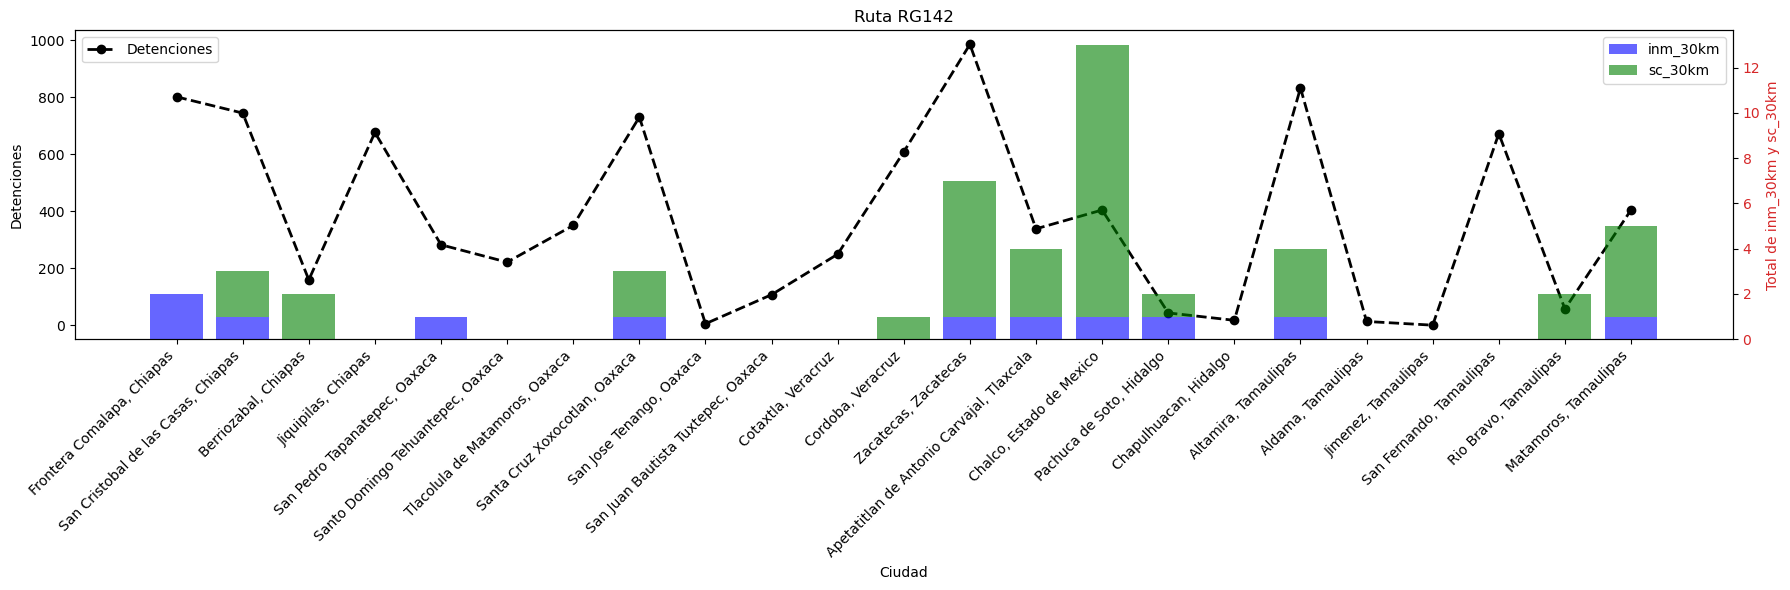

In [139]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RG142['ciudad'], ruta_RG142['detenciones'], color='black', label='Detenciones', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Detenciones', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RG142['ciudad'])
ax1.set_xticklabels(ruta_RG142['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RG142['ciudad'], ruta_RG142['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RG142['ciudad'], ruta_RG142['sc_30km'], bottom=ruta_RG142['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('Ruta RG142')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### 2. RG302

In [145]:
# Paso 1: Encuentra la secuencia para 'RG302' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_filtrado2_sorted.loc[df_filtrado2_sorted['ID_Ruta'] == 'RG302', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

# Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia

order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order'
filtered_ciudades_RG302 = filtered_ciudades.sort_values('Order')

# Mostrar el DataFrame final
filtered_ciudades_RG302.head()


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_6000/2516238171.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,detenciones,detenciones_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,Order
99,Ciudad Cuauhtémoc (terrestre),"Ciudad Cuauhtémoc , Chiapas",Chiapas,15.666406,-91.980421,FS,PG1570,FS-PG1570-1,0,0,2,0,13,0,0,35,0
95,"Frontera Comalapa, Chiapas","Frontera Comalapa, Chiapas",Chiapas,15.659014,-92.142222,S,PG1531,S-PG1531-3,802,1317,2,4,13,0,2,35,1
96,"San Cristobal de las Casas, Chiapas","San Cristobal de las Casas, Chiapas",Chiapas,16.683547,-92.615518,S,PG1532,S-PG1532-1,745,1269,1,1,13,2,3,35,2
90,"Berriozabal, Chiapas","Berriozabal, Chiapas",Chiapas,16.871689,-93.337076,S,PG1493,S-PG1493-2,160,285,0,1,13,2,3,35,3
85,"Jiquipilas, Chiapas","Jiquipilas, Chiapas",Chiapas,16.574976,-93.605654,S,PG1454,S-PG1454-2,677,680,0,0,13,0,0,35,4


In [103]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['detenciones', 'detenciones_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado']
for col in quantitative_columns:
    filtered_ciudades_RG302[col] = pd.to_numeric(filtered_ciudades_RG302[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered_ciudades_RG302, 
    geometry=gpd.points_from_xy(filtered_ciudades_RG302.longitud, filtered_ciudades_RG302.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG302.shp"
gdf.to_file(output_filename)

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_6000/3368554330.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename)


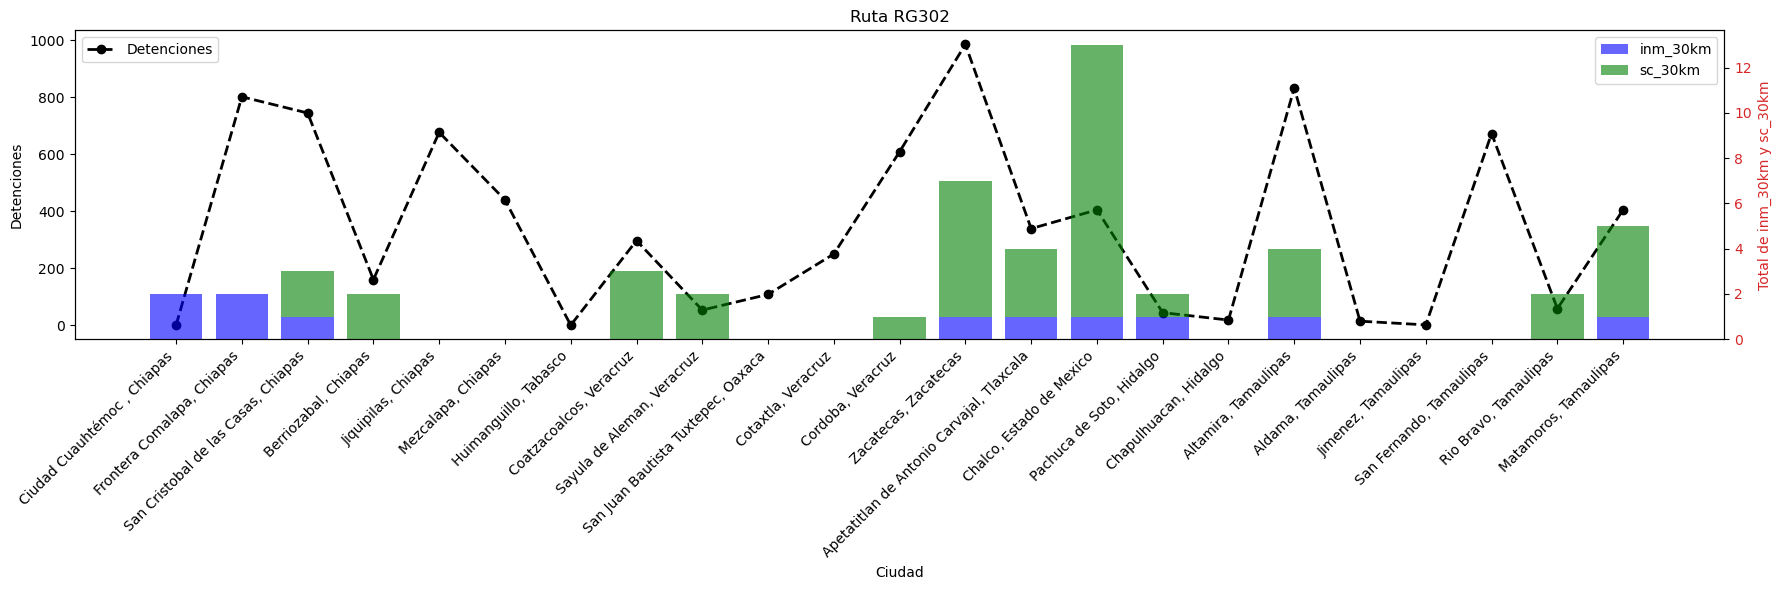

In [140]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(filtered_ciudades_RG302['ciudad'], filtered_ciudades_RG302['detenciones'], color='black', label='Detenciones', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Detenciones', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(filtered_ciudades_RG302['ciudad'])
ax1.set_xticklabels(filtered_ciudades_RG302['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(filtered_ciudades_RG302['ciudad'], filtered_ciudades_RG302['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(filtered_ciudades_RG302['ciudad'], filtered_ciudades_RG302['sc_30km'], bottom=filtered_ciudades_RG302['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('Ruta RG302')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### 3. RG034

In [105]:
# Paso 1: Encuentra la secuencia para 'RG034' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_filtrado2_sorted.loc[df_filtrado2_sorted['ID_Ruta'] == 'RG034', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

# Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia

order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order'
filtered_ciudades_RG034 = filtered_ciudades_RG034.sort_values('Order')


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_6000/3983239393.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,detenciones,detenciones_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,Order
93,"Tuxtla Chico, Chiapas","Tuxtla Chico, Chiapas",Chiapas,14.876862,-92.196752,S,PG1529,S-PG1529-3,595,610,2,0,13,17,7,35,0
94,"Escuintla, Chiapas","Escuintla, Chiapas",Chiapas,15.351003,-92.555765,S,PG1530,S-PG1530-3,19,30,2,4,13,1,11,35,1
88,"Mapastepec, Chiapas","Mapastepec, Chiapas",Chiapas,15.439810,-92.898367,S,PG1491,S-PG1491-1,36,36,0,0,13,0,0,35,2
89,"Villa Corzo, Chiapas","Villa Corzo, Chiapas",Chiapas,16.063189,-93.265003,S,PG1492,S-PG1492-1,8,8,0,1,13,0,1,35,3
84,"Tonala, Chiapas","Tonala, Chiapas",Chiapas,16.089448,-93.754650,S,PG1453,S-PG1453-2,230,230,0,0,13,3,3,35,4


In [112]:
filtered_ciudades_RG034.head()

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,detenciones,detenciones_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,Order
93,"Tuxtla Chico, Chiapas","Tuxtla Chico, Chiapas",Chiapas,14.876862,-92.196752,S,PG1529,S-PG1529-3,595,610,2,0,13,17,7,35,0
94,"Escuintla, Chiapas","Escuintla, Chiapas",Chiapas,15.351003,-92.555765,S,PG1530,S-PG1530-3,19,30,2,4,13,1,11,35,1
88,"Mapastepec, Chiapas","Mapastepec, Chiapas",Chiapas,15.439810,-92.898367,S,PG1491,S-PG1491-1,36,36,0,0,13,0,0,35,2
89,"Villa Corzo, Chiapas","Villa Corzo, Chiapas",Chiapas,16.063189,-93.265003,S,PG1492,S-PG1492-1,8,8,0,1,13,0,1,35,3
84,"Tonala, Chiapas","Tonala, Chiapas",Chiapas,16.089448,-93.754650,S,PG1453,S-PG1453-2,230,230,0,0,13,3,3,35,4


In [106]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['detenciones', 'detenciones_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado']
for col in quantitative_columns:
    filtered_ciudades_RG034[col] = pd.to_numeric(filtered_ciudades_RG034[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered_ciudades_RG034, 
    geometry=gpd.points_from_xy(filtered_ciudades_RG034.longitud, filtered_ciudades_RG034.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG034.shp"
gdf.to_file(output_filename)

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_6000/1850411660.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename)


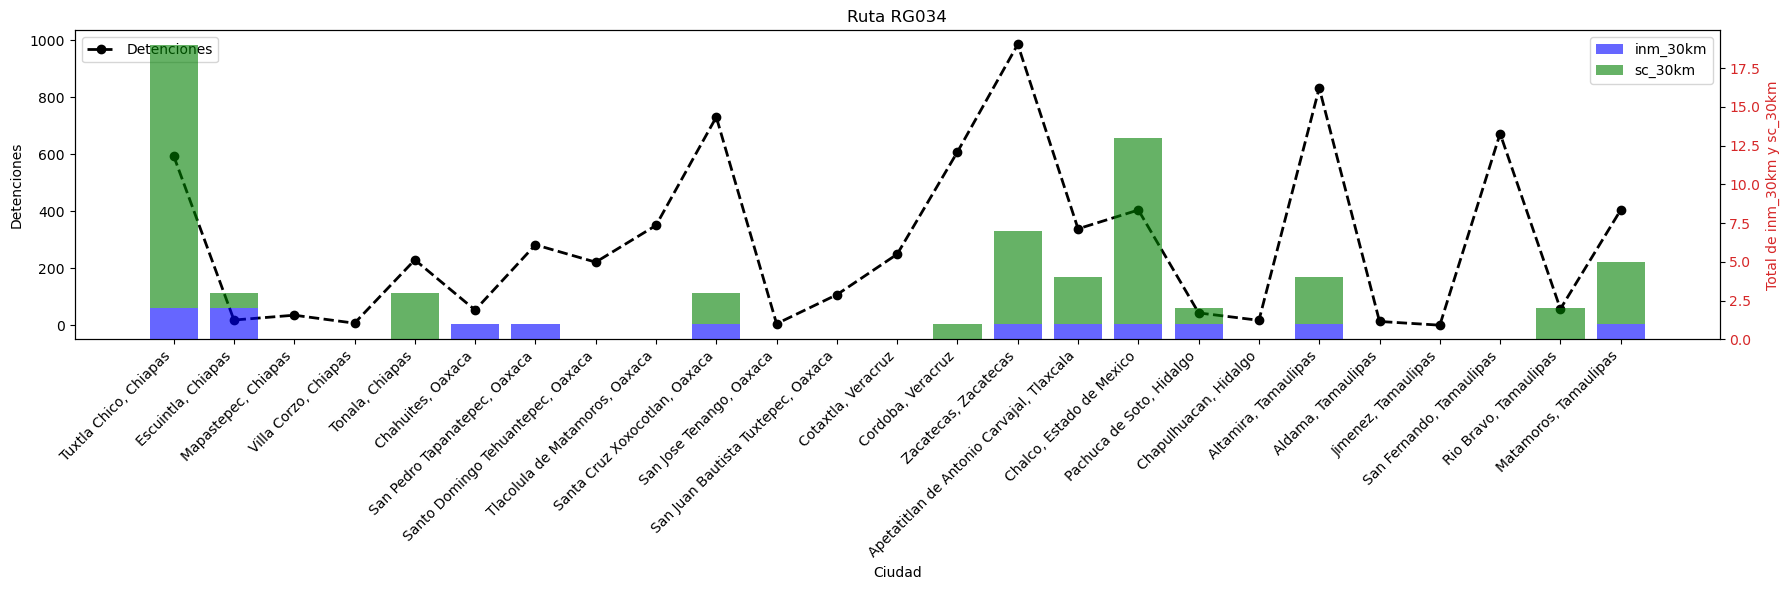

In [141]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(filtered_ciudades_RG034['ciudad'], filtered_ciudades_RG034['detenciones'], color='black', label='Detenciones', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Detenciones', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(filtered_ciudades_RG034['ciudad'])
ax1.set_xticklabels(filtered_ciudades_RG034['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(filtered_ciudades_RG034['ciudad'], filtered_ciudades_RG034['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(filtered_ciudades_RG034['ciudad'], filtered_ciudades_RG034['sc_30km'], bottom=filtered_ciudades_RG034['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('Ruta RG034')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Las 3 -

RG733



In [146]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_golfo_sumas.loc[df_golfo_sumas['ID_Ruta'] == 'RG733', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order'
ruta_RG733 = filtered_ciudades.sort_values('Order')

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_6000/398124765.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)


In [147]:
ruta_RG733.head(40)

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,detenciones,detenciones_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,Order
100,"Palenque, Chiapas","Palenque, Chiapas",Chiapas,17.509188,-91.980922,S,PG1572,S-PG1572-1,0,0,2,2,13,2,5,35,0
97,"Salto de Agua, Chiapas","Salto de Agua, Chiapas",Chiapas,17.434898,-92.224802,S,PG1533,S-PG1533-2,9,12,1,0,13,0,0,35,1
91,"Copainala, Chiapas","Copainala, Chiapas",Chiapas,17.093021,-93.210211,S,PG1494,S-PG1494-1,7,8,0,0,13,0,0,35,2
87,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,17.762097,-93.663441,G,PG1456,G-PG1456-1,0,0,0,0,3,0,0,0,3
83,"Coatzacoalcos, Veracruz","Coatzacoalcos, Veracruz",Veracruz,18.139679,-94.450173,G,PG1417,G-PG1417-3,297,405,0,0,3,3,3,12,4
79,"Sayula de Aleman, Veracruz","Sayula de Aleman, Veracruz",Veracruz,17.747683,-94.954398,G,PG1378,G-PG1378-3,53,69,0,1,3,2,2,12,5
80,"San Andres Tuxtla, Veracruz","San Andres Tuxtla, Veracruz",Veracruz,18.463367,-95.198315,G,PG1379,G-PG1379-2,102,119,0,0,3,0,0,12,6
75,"Alvarado, Veracruz","Alvarado, Veracruz",Veracruz,18.828742,-95.923854,G,PG1340,G-PG1340-2,59,86,0,0,3,0,0,12,7
73,"La Antigua, Veracruz","La Antigua, Veracruz",Veracruz,19.317680,-96.318641,G,PG1302,G-PG1302-2,160,160,1,0,3,1,0,12,9
64,"Xalapa, Veracruz","Xalapa, Veracruz",Veracruz,19.540834,-96.914637,G,PG1263,G-PG1263-4,109,115,0,0,3,4,4,12,10


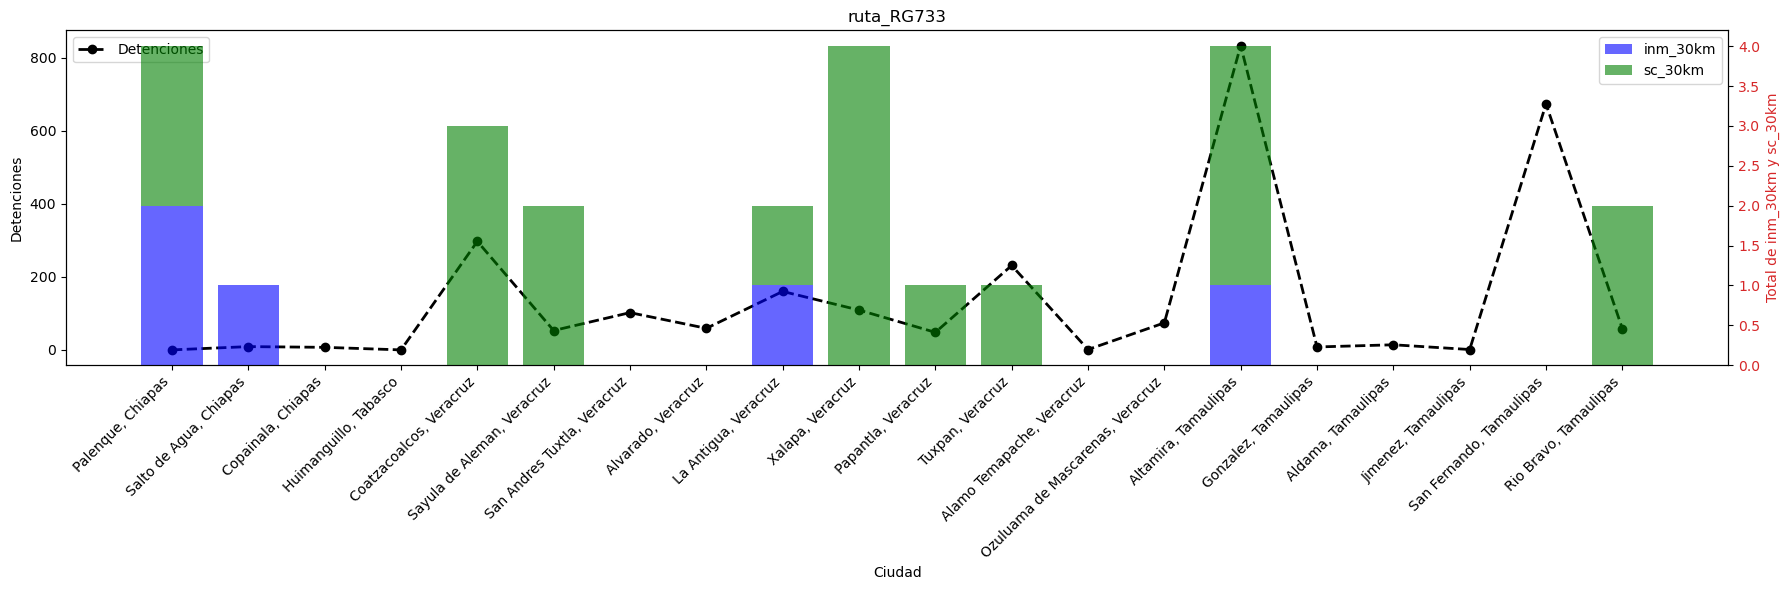

In [150]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RG733['ciudad'], ruta_RG733['detenciones'], color='black', label='Detenciones', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Detenciones', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RG733['ciudad'])
ax1.set_xticklabels(ruta_RG733['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RG733['ciudad'], ruta_RG733['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RG733['ciudad'], ruta_RG733['sc_30km'], bottom=ruta_RG733['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('ruta_RG733')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Rutas Centro

### Rutas Pacifico